### Importing required libraries and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [3]:
raw_data = pd.read_excel("Sample_Longlist_Data.xlsx")
raw_data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [4]:
raw_data.shape

(1839, 18)

- The data consists of 1839 sellers from Amazon
- Each datapoint relating to a seller contains 19 unique columns that conveys differnt information pertaining to a seller

### Data Cleaning

In [5]:
#Checking the column names of the Dataframe
raw_data.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL'],
      dtype='object')

In [6]:
# Renaming the columns for better access
dict = {'seller business name':'SellerBusinessName',
    'Count of seller brands':'SellerBrandCount',
       'Max % of negative seller ratings - last 30 days' : '30DaysNegativeratings%',
       'Max % of negative seller ratings - last 90 days':'90DaysNegativeratings%',
       'Max % of negative seller ratings - last 12 months': '12MonNegativeratings%',
       'Hero Product 1 #ratings':'HeroPdt1Rating', 'Hero Product 2 #ratings':'HeroPdt2Rating',
       'Sample brand name': 'BrandName', 'Sample Brand URL':'BrandURL'}
raw_data.rename(columns=dict, inplace=True)
raw_data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,SellerBusinessName,businessaddress,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,BrandName,BrandURL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Added              1839 non-null   datetime64[ns]
 1   category                1839 non-null   object        
 2   sellerlink              1839 non-null   object        
 3   sellerlink-url          1839 non-null   object        
 4   sellerstorefront-url    1839 non-null   object        
 5   sellerproductcount      1513 non-null   object        
 6   sellerratings           1411 non-null   object        
 7   sellerdetails           1812 non-null   object        
 8   SellerBusinessName      1783 non-null   object        
 9   businessaddress         1764 non-null   object        
 10  SellerBrandCount        1839 non-null   int64         
 11  30DaysNegativeratings%  1839 non-null   int64         
 12  90DaysNegativeratings%  1839 non-null   int64   

- As can be seen from the above cell, all of the columns except 4 columns i.e. "sellerproductcount", "sellerratings", "seller business name" and "businessaddress", does not have any missing values. 
- Moreover the datatype of the columns also have been correctly identified.

In [8]:
#Removing the spaces in the dataframe
raw_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,SellerBusinessName,businessaddress,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,BrandName,BrandURL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,2020-11-15,Garden,Seller 1835,Seller 1835-link,Seller 1835-storefrontlink,"1-16 of over 2,000 results",83% positive in the last 12 months (46 ratings),ZZM Store is committed to providing each custo...,"Business Name:Shenzhen Xinyile Trading Co., Ltd",Longhuaxinqu Longhuajiedao YousongDiergongyequ...,5,0,9,15,95,76,ZZMUK,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1835,2020-11-15,Garden,Seller 1836,Seller 1836-link,Seller 1836-storefrontlink,"1-16 of over 5,000 results",NaN,ZZMIARY is committed to providing each custome...,Business Name:wujixianzhanpingzongheshangdian,hebeishengshijiazhuangshiwujixiangaotouxiangxi...,0,0,0,0,1,0,Not Applicable,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1836,2020-11-15,Garden,Seller 1837,Seller 1837-link,Seller 1837-storefrontlink,"1-16 of over 10,000 results",0% positive lifetime (1 total ratings),zzshd75 is committed to providing each custome...,Business Name:henanliyanshangmaoyouxiangongsi,lankaoxianzhangjunmuzhenzhengzhuangcunerzukaif...,10,0,0,0,1,1,zwbaobei,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1837,2020-11-15,Garden,Seller 1838,Seller 1838-link,Seller 1838-storefrontlink,1-16 of 473 results,67% positive lifetime (3 total ratings),ZZY xiaodian is committed to providing each cu...,Business Name:shanximinsanyizhuangshijiancaiyo...,bei san huan da ming gong jian cai shi changba...,4,0,0,33,9,1,ZZYXiao,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [9]:
raw_data['country'] = raw_data['businessaddress'].str[-2:]
raw_data.head(10)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,SellerBusinessName,businessaddress,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,BrandName,BrandURL,country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,DE
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,CN
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,CN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,CN
5,2020-11-15,Garden,Seller 6,Seller 6-link,Seller 6-storefrontlink,1-16 of 28 results,NaN,7830jeff is committed to providing each custom...,NaN,NaN,13,0,0,0,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN
6,2020-11-15,Garden,Seller 7,Seller 7-link,Seller 7-storefrontlink,"1-16 of over 4,000 results",NaN,7hgfeee is committed to providing each custome...,Business Name:quanzhoushixindazhixiangyouxiang...,fengzequbeifengjiedaoshantianlu46haoquanzhoush...,6,0,0,0,18,1,Gaorb040703,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,CN
7,2020-11-15,Garden,Seller 8,Seller 8-link,Seller 8-storefrontlink,"1-16 of over 3,000 results",NaN,7s6fguisdhj is committed to providing each cus...,Business Name:jinangeshunshangmaoyouxiangongsi,TianQiaoQuTongYuanJuQianJie11HaoAQu204JiNanShi...,1,0,0,0,0,0,Tuzi,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,CN
8,2020-11-15,Garden,Seller 9,Seller 9-link,Seller 9-storefrontlink,1-16 of 133 results,100% positive lifetime (4 total ratings),7WallArts is committed to providing each custo...,Business Name:SEVEN WALL ARTS (XIAMEN) LIMITED,No.267 Northern Industrial Zone Jinli VillageH...,1,0,0,0,65,9,SEVEN WALL ARTS,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,CN
9,2020-11-15,Garden,Seller 10,Seller 10-link,Seller 10-storefrontlink,"1-16 of over 3,000 results",NaN,87efef is committed to providing each customer...,Business Name:sichuanchangkonglüyefuwuyouxianz...,jinjiangqujinghuananlu95haochengdushisichuansh...,4,0,0,0,6,1,Mingi,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,CN


In [10]:
raw_data['country'].value_counts()

CN    1237
DE     364
GB      47
IT      25
ES      15
US      14
NL      12
FR      11
HK      10
AT       8
PL       5
IN       4
JP       2
IE       2
CZ       2
PT       1
SE       1
BE       1
AU       1
TH       1
CH       1
Name: country, dtype: int64

In [11]:
raw_data['country'].count()

1764

In [12]:
sum(raw_data['country'].isna())

75

### Removing the data of Chinese sellers

- Among the 1839 sellers provided, 1237 of the sellers are located in China
- Hence, our primary data cleaning involves removing these sellers from our dataset
- Secondly, we will also be eliminating the sellers with no business name and address as we cannot identify 

In [13]:
new_data = raw_data[raw_data['country']!='CN']
new_data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,SellerBusinessName,businessaddress,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,BrandName,BrandURL,country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,DE
5,2020-11-15,Garden,Seller 6,Seller 6-link,Seller 6-storefrontlink,1-16 of 28 results,NaN,7830jeff is committed to providing each custom...,NaN,NaN,13,0,0,0,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,0,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,DE
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,0,18,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,DE


In [14]:
new_data = new_data.dropna(subset=['SellerBusinessName', 'businessaddress'])

In [15]:
new_data.shape

(527, 19)

- Removing the Chinese suppliers and sellers with no information reduced our dataset to 527 sellers

### Extracting the postive ratings from the data

In [16]:
#Before we can extract the positive ratings, we will remove the sellers with no information of positive ratings
sum(new_data['sellerratings'].isnull())

7

- We will remove the data of 7 sellers 

In [17]:
new_data = new_data.dropna(subset=['sellerratings'])
new_data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,SellerBusinessName,businessaddress,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,BrandName,BrandURL,country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,DE
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,0,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,DE
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,0,18,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,DE
21,2020-11-15,Garden,Seller 22,Seller 22-link,Seller 22-storefrontlink,NaN,92% positive in the last 12 months (181 ratings),Firmenwortlaut: GURU2016GmbH\n Geschäftsführun...,Business Name:GURU 2016 GmbH,"BAUGURU, GURU 2016 GmbHWarenannahme Vogl Bauma...",0,0,7,6,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,AT


In [18]:
# Another important assumption in our analysis is that the column 'sellerratings' that consists lifetime seller ratings 
    #are new sellers and hence does not have a proven track record.
    #Hence, it is safe to elimnate those sellers
    
new_data = new_data[new_data['sellerratings'].str.contains('last 12 months')]


In [19]:
#Defining a function to extract percent positive ratings and total positive ratings for the seller

def extract_ratings(text):
    pattern = r'(\d+)% positive.*?(\d+) (?:total )?ratings'
    match = re.search(pattern, text)
    if match:
        percent = match.group(1)
        num_ratings = match.group(2)
        return percent, num_ratings
    else:
        return None, None

new_data['12MonPositiveRatings%'], new_data['12mon_positive_ratings'] = zip(*new_data['sellerratings'].apply(extract_ratings))


In [20]:
new_data['12MonPositiveRatings%'] = new_data['12MonPositiveRatings%'].astype('int')
new_data['12mon_positive_ratings'] = new_data['12mon_positive_ratings'].astype('int')
new_data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,SellerBusinessName,businessaddress,...,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,BrandName,BrandURL,country,12MonPositiveRatings%,12mon_positive_ratings
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,US,88,118
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,DE,90,566
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,0,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,DE,97,116
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,...,18,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,DE,76,3721
21,2020-11-15,Garden,Seller 22,Seller 22-link,Seller 22-storefrontlink,NaN,92% positive in the last 12 months (181 ratings),Firmenwortlaut: GURU2016GmbH\n Geschäftsführun...,Business Name:GURU 2016 GmbH,"BAUGURU, GURU 2016 GmbHWarenannahme Vogl Bauma...",...,0,7,6,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,AT,92,181


In [21]:
new_data.shape

(440, 21)

- The number of potential sellers thus far is 440

In [22]:
#furthermore, the data shows that few sellers have 0 ratings for Hero product #1 and 2.
# This signifies that the seller is does not have a hero product and hence is not a desirable seller
#Moreover, sellers having only hero product 1 ratings and zero ratings for product 2 signifies that they have only one star product 
# This poses a potential threat, hence we would not approach such seller as well
sum(new_data['HeroPdt2Rating']==0)

82

In [23]:
# Removing the 82 sellers from our dataset
heropdt_new_data = new_data[new_data['HeroPdt2Rating']!=0]

In [24]:
heropdt_new_data.shape

(358, 21)

In [25]:
#One additonal check is to verify that the seller has atleast one positive rating
sum(heropdt_new_data['12mon_positive_ratings']==0)

0

In [26]:
heropdt_new_data['country'].value_counts()

DE    281
GB     30
US     10
HK      7
AT      5
FR      4
NL      4
IT      4
ES      3
JP      2
CZ      2
AU      1
BE      1
IE      1
PL      1
IN      1
CH      1
Name: country, dtype: int64

This is the final geographical density of sellers in our analysis.

### Descriptive analytics of the data

#### The first stage of this step involves analysing univariate summary statistics and visual analytics

In [27]:
heropdt_new_data.describe()

,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,12MonPositiveRatings%,12mon_positive_ratings
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,12.430168,5.935754,5.776536,6.094972,5745.326816,3210.206704,92.472067,442.083799
std,4.939906,13.692862,8.790134,7.280066,11903.188967,7668.823631,8.283699,967.095915
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,41.000000,10.000000
25%,12.000000,0.000000,0.000000,2.000000,277.250000,152.250000,90.000000,37.250000
50%,15.000000,0.000000,3.000000,4.000000,1493.000000,801.000000,95.000000,123.500000
75%,16.000000,6.000000,8.000000,8.000000,6061.500000,2861.250000,97.000000,316.000000
max,16.000000,100.000000,75.000000,54.000000,86856.000000,70732.000000,100.000000,7465.000000


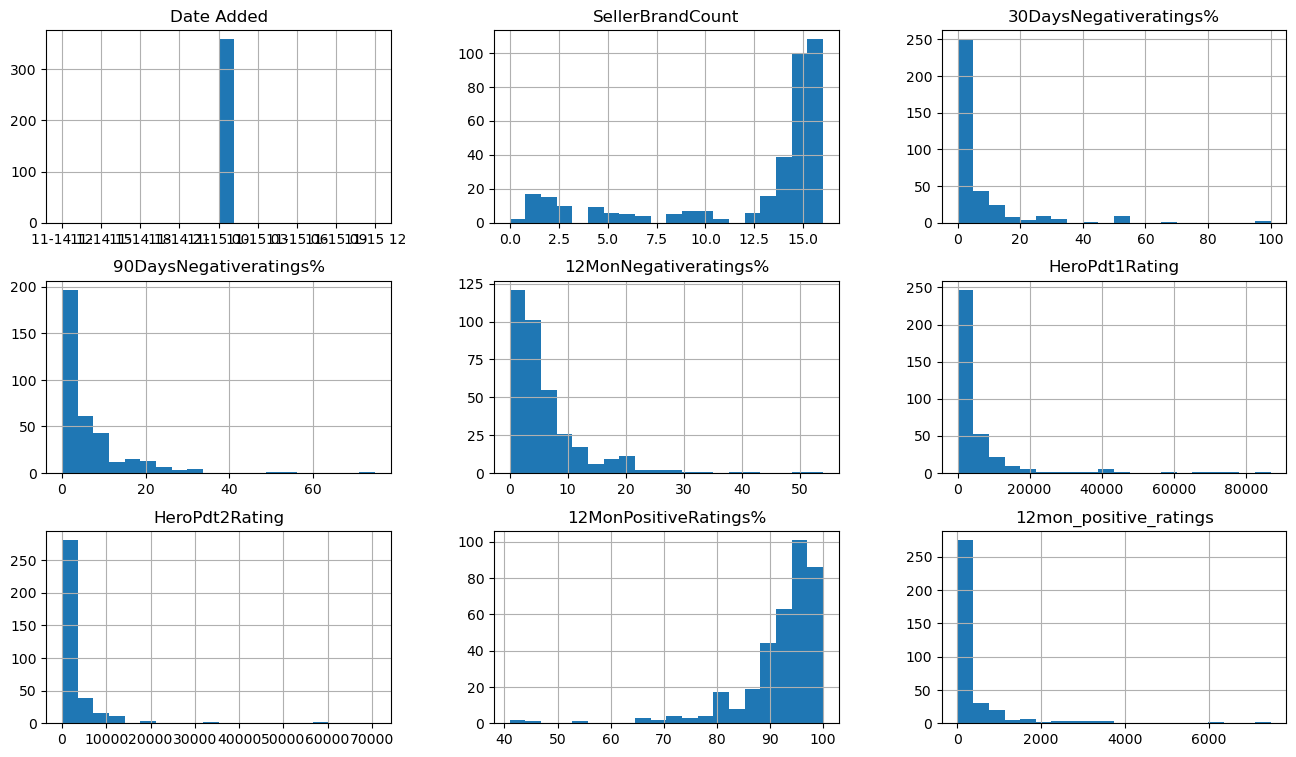

In [28]:
heropdt_new_data.hist(bins = 20, figsize = (16,9))
plt.show()

- Preliminary Vislaization highlights coupleof uinteresting points

1) Majority of the sellers have more than 13 brands (which is also evident from the summary statistics above; median is 15 and max brands are 16)

2) All the product ratings are right skewed

3) Even though the total ratings of the seller are positively skewed, the percent of positive ratings are left skewed which is an important observation

#### Checking correlation in data

In [29]:
num_cols = heropdt_new_data.select_dtypes(include='int')

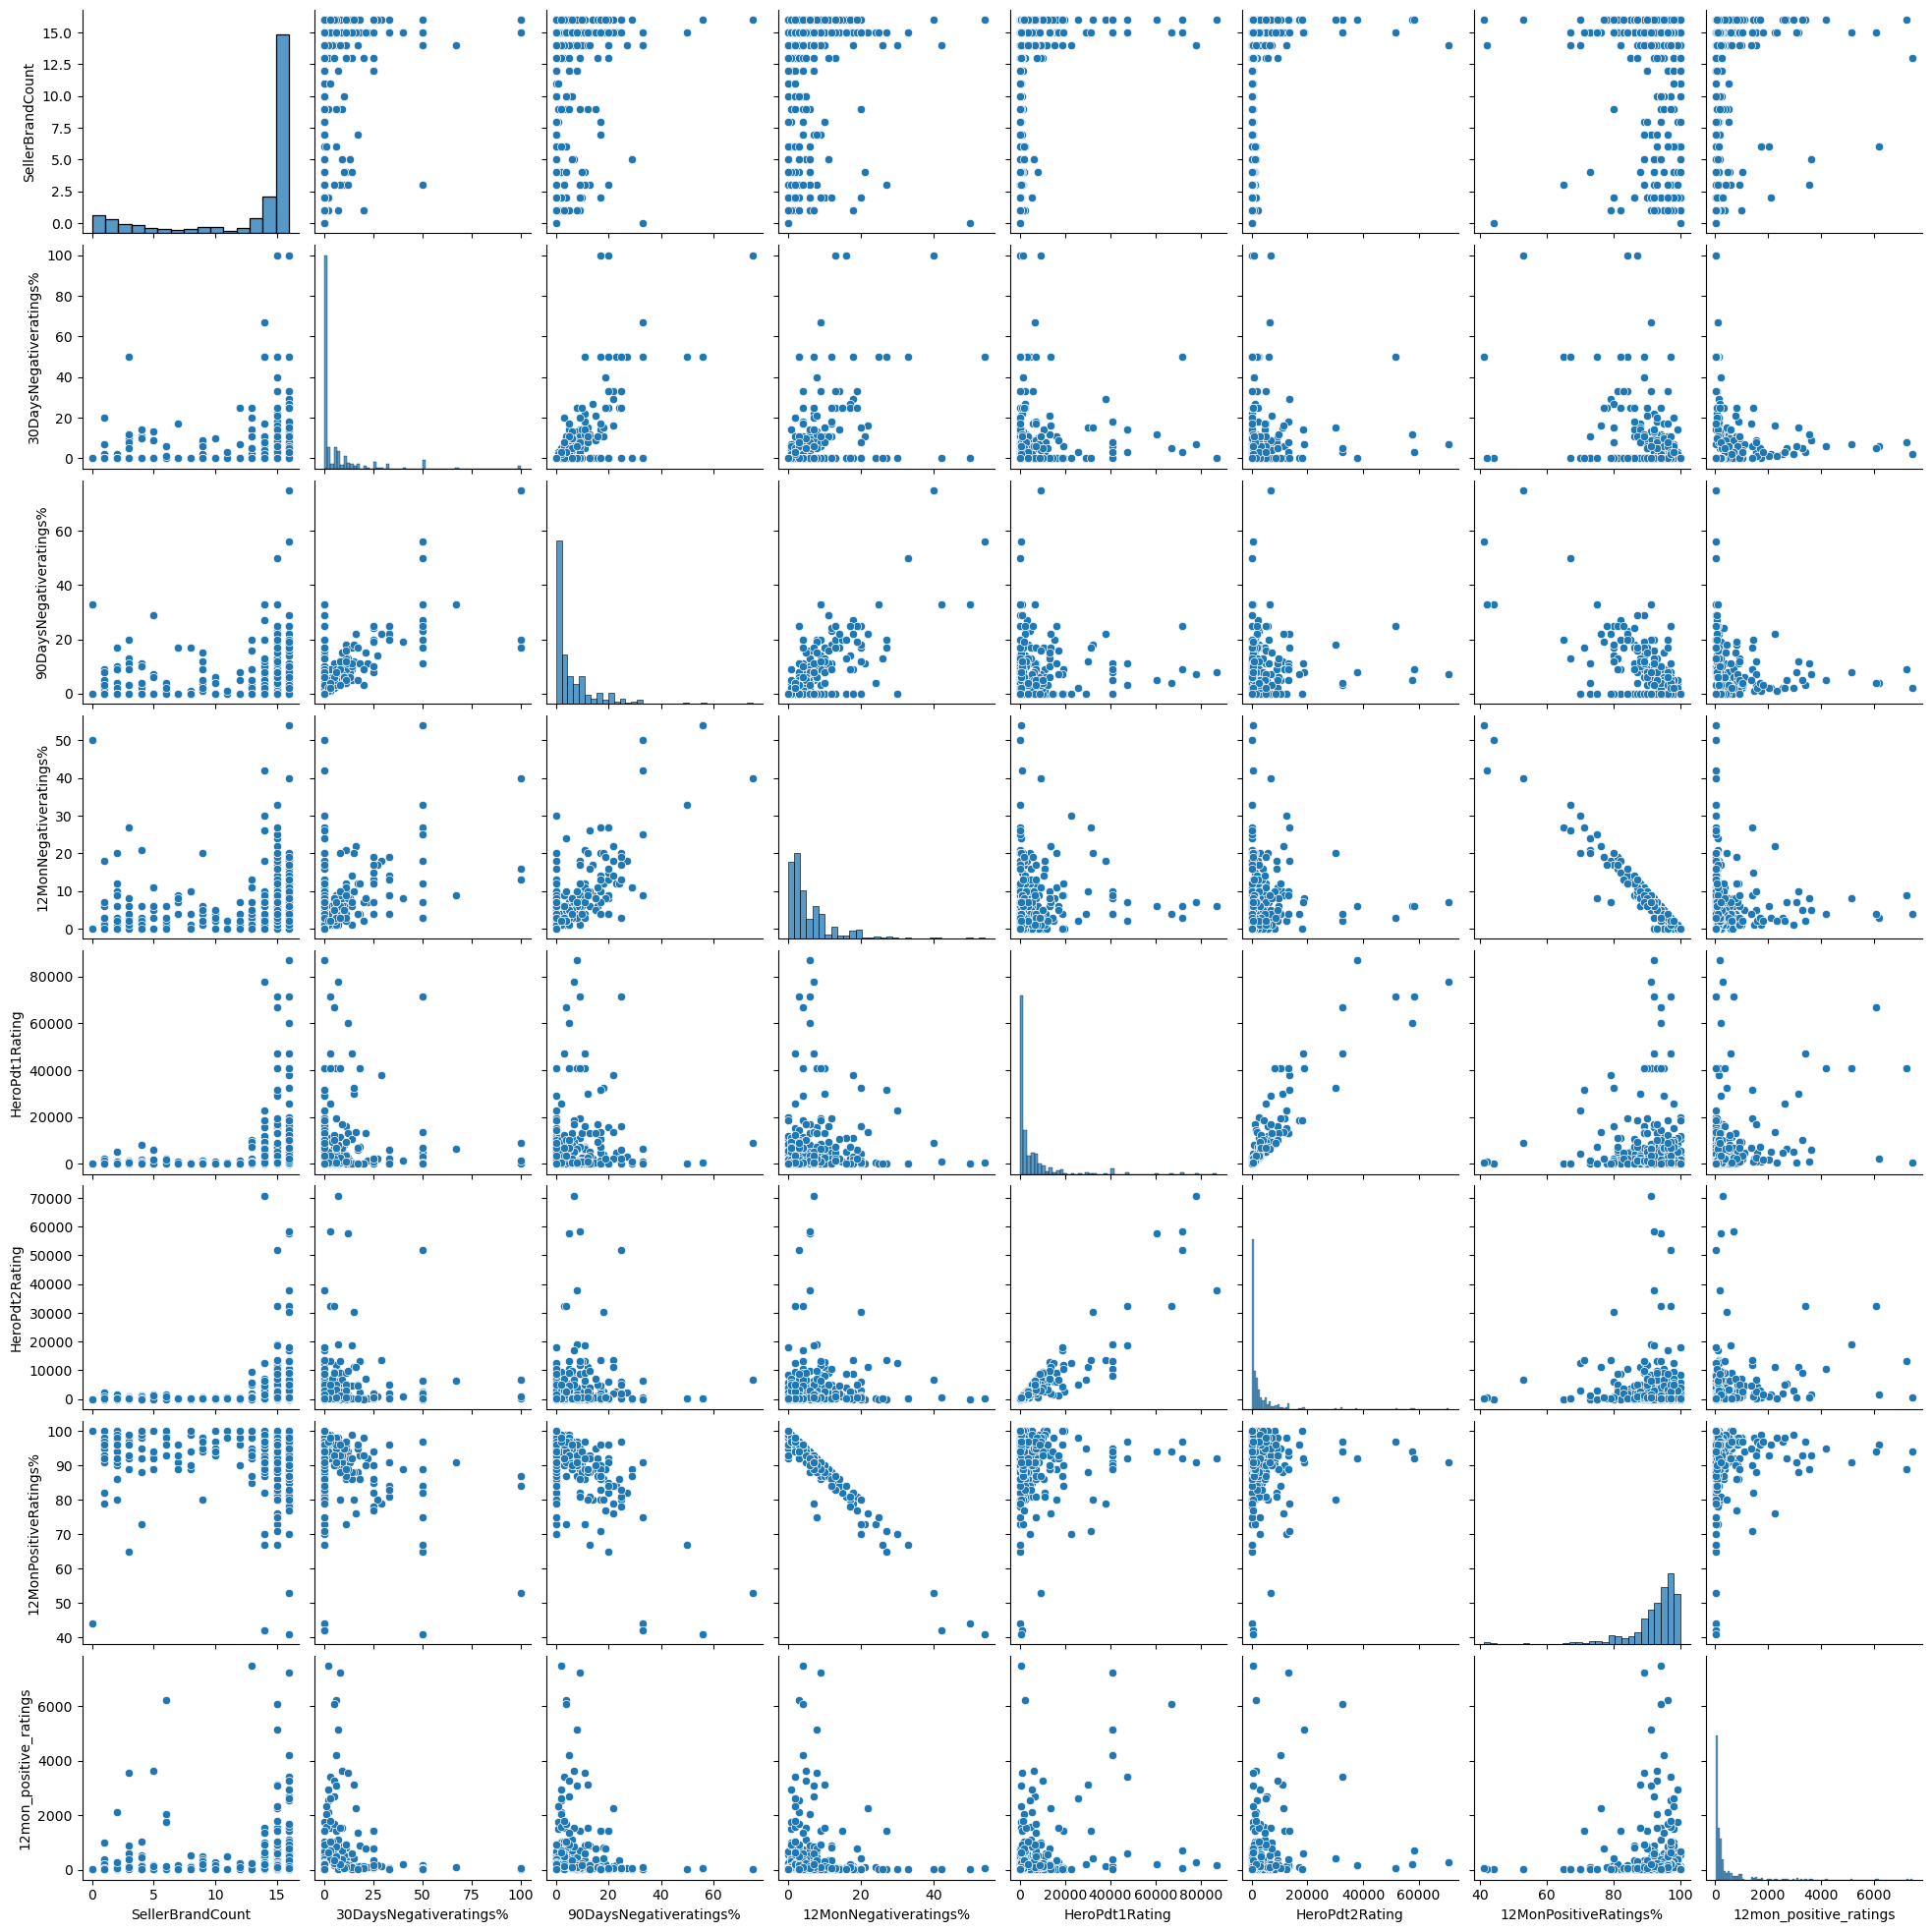

In [30]:
sns.pairplot(num_cols)
plt.show()

In [31]:
heropdt_new_data.corr()

,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,12MonPositiveRatings%,12mon_positive_ratings
SellerBrandCount,1.000000,0.134541,0.116594,0.067326,0.256501,0.224172,-0.051456,0.058247
30DaysNegativeratings%,0.134541,1.000000,0.702988,0.417230,0.083089,0.094333,-0.386163,-0.008076
90DaysNegativeratings%,0.116594,0.702988,1.000000,0.714655,0.108645,0.110828,-0.676988,-0.008842
12MonNegativeratings%,0.067326,0.417230,0.714655,1.000000,0.067281,0.062200,-0.972171,-0.048473
HeroPdt1Rating,0.256501,0.083089,0.108645,0.067281,1.000000,0.904729,-0.055303,0.289934
HeroPdt2Rating,0.224172,0.094333,0.110828,0.062200,0.904729,1.000000,-0.046284,0.192238
12MonPositiveRatings%,-0.051456,-0.386163,-0.676988,-0.972171,-0.055303,-0.046284,1.000000,0.049337
12mon_positive_ratings,0.058247,-0.008076,-0.008842,-0.048473,0.289934,0.192238,0.049337,1.000000


- The above table gives some interesting results for further analysis

1) '90DaysNegativeratings%' is highly correlated with '30DaysNegativeratings%' as well as '12MonNegativeratings%', whereas on the other hand '30DaysNegativeratings%' and '12MonNegativeratings%' are weakly correlated at 41.7%. Hence, prediction models being built have to neglect '90DaysNegativeratings%' to eliminate "Multicollinearity" in the data

2) 'HeroPdt1Rating' and 'HeroPdt2Rating' are very strongly correlated, as can be expected.

3) '12MonPositiveRatings%' of seller has a very strong inverse correlation with '12MonNegativeratings%' and strong inverse correlation with '90DaysNegativeratings%' , which can be explained as, if a seller has a good positive ratings in the last 12 months, he has very few negative negative reatings for the product.

### Attribute level analysis
- Our data cleaning has led us to identify 358 potential sellers from a list of 1839 sellers data
- Now we would like to look more closely at attribute level

In [59]:
# First step would be to identify the seller based on their sellerrating percentage.
# As the data is left skewed, we can take median percentage of postive ratings for a seller as a reasonable point 
# One can also argue that the number of positive reviews will also have an impact along with positive rating percentage
# Hence, we can also number of positive ratings and select sellers having positive ratings more than the thrid quartile 
    #i.e. 316 positive ratings which is a decent number 
seller_heropdtdata = heropdt_new_data[(heropdt_new_data['12MonPositiveRatings%']>=95) & (heropdt_new_data['12mon_positive_ratings']>=heropdt_new_data['12mon_positive_ratings'].quantile(0.75))]
seller_heropdtdata.shape

(52, 21)

In [60]:
seller_heropdtdata.describe()

,SellerBrandCount,30DaysNegativeratings%,90DaysNegativeratings%,12MonNegativeratings%,HeroPdt1Rating,HeroPdt2Rating,12MonPositiveRatings%,12mon_positive_ratings
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,12.826923,3.076923,2.615385,2.192308,5335.365385,2748.173077,97.153846,1163.096154
std,4.792646,3.294952,2.434667,1.155353,9008.761026,4764.685524,1.334087,1107.880015
min,1.000000,0.000000,0.000000,0.000000,113.000000,88.000000,95.000000,318.000000
25%,13.250000,0.000000,1.000000,1.000000,921.250000,456.000000,96.000000,496.750000
50%,15.000000,2.500000,2.000000,2.000000,2169.000000,1516.500000,97.000000,769.000000
75%,16.000000,4.250000,4.000000,3.000000,6303.750000,3079.000000,98.000000,1387.500000
max,16.000000,17.000000,15.000000,5.000000,47337.000000,32420.000000,100.000000,6204.000000


In [61]:
# Once we have established that the sellers are trustworthy through their positive reviews, we want to identify their potential using heropdt1 and 2 reviews
# An important assumption here is that the number of reviews are highly correlated with the number of sales, which motivates people to leave a positive or negative review
# Hence, selecting the sellers with hero product reviews more than the median of the product ratings

seller_heropdtdata = seller_heropdtdata[(seller_heropdtdata['HeroPdt1Rating']>=seller_heropdtdata['HeroPdt1Rating'].median()) & 
                                        (seller_heropdtdata['HeroPdt2Rating']>=seller_heropdtdata['HeroPdt2Rating'].median())]

In [62]:
seller_heropdtdata.shape

(21, 21)

In [63]:
# Now that we have utilized the opportunities, we would like to minimize the risks of our investments
# For this negative product rating percentages can be taken into consideration
# Performance over along period of time is important, 
    #we would like to select sellers with least negative rating percentage in last 12 months
    
low_risk_sellers_1 = seller_heropdtdata[seller_heropdtdata['12MonNegativeratings%']>=seller_heropdtdata['12MonNegativeratings%'].median()]

In [64]:
seller_heropdtdata['sellerlink']

24        Seller 25
53        Seller 54
100      Seller 101
186      Seller 187
191      Seller 192
417      Seller 418
434      Seller 435
493      Seller 494
538      Seller 539
629      Seller 630
723      Seller 724
804      Seller 805
852      Seller 853
972      Seller 973
1046    Seller 1047
1051    Seller 1052
1053    Seller 1054
1502    Seller 1503
1723    Seller 1724
1766    Seller 1767
1784    Seller 1785
Name: sellerlink, dtype: object

In [68]:
# To check the robustness of our results obtained, we can cross check the low risk sellers against 
        #the sellers having ratings more than the average of medians of 30 days, 90 days and 12  months
    
seller_heropdtdata['avg_risk'] = seller_heropdtdata[['30DaysNegativeratings%', '90DaysNegativeratings%','12MonNegativeratings%']].mean(axis=1)
average_median_risk = seller_heropdtdata[['30DaysNegativeratings%', '90DaysNegativeratings%','12MonNegativeratings%']].median(axis=1).mean()

In [80]:
low_risk_sellers_2 = seller_heropdtdata[seller_heropdtdata['avg_risk']>=average_median_risk]
low_risk_sellers_2['sellerlink']

53        Seller 54
186      Seller 187
629      Seller 630
723      Seller 724
804      Seller 805
972      Seller 973
1051    Seller 1052
1053    Seller 1054
1502    Seller 1503
1766    Seller 1767
Name: sellerlink, dtype: object

### Conclusion 
- It is clealry evident that the 10 sellers mentioend above follows our selection criteria and also rank at the top compared to others
- Secondly, the robust method also confirms the same
- Furthermore,sentiment analysis can be our next step of analysis; in the presence of elaborate text reviews